In [32]:
import requests
import json
import pandas as pd
import datetime as datetime
pd.set_option('display.max_rows', None)

In [5]:
base_url = "https://covid.cdc.gov/covid-data-tracker/COVIDData/getAjaxData?id=vaccination_data"
# API_Key = 5w4pbbn3cpbklajqvddmud1aj
# API_Key_Secret = 364c5uek5qbvtgfks441wv5w0jomcb9vc0tcdzcwa78y02c97w

In [6]:
response = requests.get(base_url)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

# Convert to JSON
cdc_data = response.json()

In [7]:
cdc_data

{'runid': 1942,
 'vaccination_data': [{'Date': '2021-05-03',
   'Location': 'US',
   'ShortName': 'USA',
   'LongName': 'United States',
   'Census2019': 331996199,
   'date_type': 'Report',
   'Doses_Distributed': 312509575,
   'Doses_Administered': 246780203,
   'Dist_Per_100K': 94130,
   'Admin_Per_100K': 74332,
   'Administered_Moderna': 107155797,
   'Administered_Pfizer': 131030537,
   'Administered_Janssen': 8409505,
   'Administered_Unk_Manuf': 184364,
   'Administered_Dose1_Recip': 147517734,
   'Administered_Dose1_Pop_Pct': 44.4,
   'Administered_Dose2_Pop_Pct': 29.3,
   'Administered_Dose1_Recip_18Plus': 145346819,
   'Administered_Dose1_Recip_18PlusPop_Pct': 56.3,
   'Administered_18Plus': 243876762,
   'Admin_Per_100k_18Plus': 94478,
   'Distributed_Per_100k_18Plus': 121066,
   'Administered_Dose1_Recip_65Plus': 45297502,
   'Administered_Dose1_Recip_65PlusPop_Pct': 82.8,
   'Administered_65Plus': 82817237,
   'Admin_Per_100k_65Plus': 151411,
   'Distributed_Per_100k_65Plu

In [63]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("9mfq-cb36", limit=25000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
# Year
# Month
# Week (group by)
# Cases
# Death

In [64]:
results_df.count()

submission_date    25000
state              25000
tot_cases          25000
new_case           25000
pnew_case          20680
tot_death          25000
new_death          25000
pnew_death         20518
created_at         25000
consent_cases      22905
consent_deaths     22905
conf_death         11885
prob_death         11885
conf_cases         11371
prob_cases         11370
dtype: int64

In [65]:
r_dff = results_df[["submission_date","state","tot_cases","new_case","tot_death","new_death"]]
new_cases = r_dff["new_case"].astype(float)
total_cases = r_dff["tot_cases"].astype(float)
total_deaths = r_dff["tot_death"].astype(float)
new_deaths = r_dff["new_death"].astype(float)

In [66]:
# New Date Frame
# Date field to convert to week
# state
# Covid 19 Deaths
# Excess Deaths
# New columns: Cumulative Covid-19 and Cumulative Excess
date = r_dff["submission_date"]
states = r_dff["state"]
new_dfff = pd.DataFrame({"Date":date,"Year":"", "Month":"","Week":"","State": states,"Covid_19_Cases": new_cases, "Cum_Covid_19_Cases":total_cases,"Covid_19_Deaths": new_deaths,"Cum_Covid19_Deaths": total_deaths,"Death_Rate":100*total_deaths/total_cases})

In [67]:
for index, row in new_dfff.iterrows():
    # Calculate Year, Month and Week
    year = int(row[0][:4])
    month = int(row[0][5:7])
    new_dfff.loc[index,"Year"] = year
    new_dfff.loc[index,"Month"] = month
    
    week = datetime.date(int(row[0][:4]),int(row[0][5:7]),int(row[0][8:10])).isocalendar()[1]
    new_dfff.loc[index,"Week"] = week

In [82]:
dffff_new = new_dfff.groupby(by=["State","Year","Month"])
dffff_new["Cum_Covid_19_Cases","Cum_Covid19_Deaths"].max()

<ipython-input-82-86d2aac7dd6d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dffff_new["Cum_Covid_19_Cases","Cum_Covid19_Deaths"].max()


Cum_Covid_19_Cases  Cum_Covid19_Deaths
State Year Month                                        
AK    2020 1                     0.0                 0.0
           2                     0.0                 0.0
           3                   128.0                 6.0
           4                   355.0                 9.0
           5                   463.0                13.0
           6                   908.0                17.0
           7                  2993.0                33.0
           8                  5290.0                52.0
           9                  7891.0                69.0
           10                15398.0               116.0
           11                31793.0               205.0
           12                45771.0               281.0
      2021 1                 52762.0               308.0
           2                 56212.0               323.0
           3                 60538.0               340.0
           4                 65409.0               341.0
           5                 65409.0               341.0
AL    2020 1                    56.0                 0.0
           2                   111.0                 1.0
           3                  3164.0                49.0
           4                  9739.0               385.0
           5                 21539.0               863.0
           6                 46649.0              1339.0
           7                102433.0              2295.0
           8                138286.0              3349.0
           9                164881.0              3961.0
           10               199048.0              4550.0
           11               262796.0              5341.0
           12               383107.0              7114.0
      2021 1                474548.0              9460.0
           2                505826.0             10406.0
           3                519181.0             10760.0
           4                527922.0             10896.0
           5                528597.0             10913.0
AR    2020 1                     0.0                 0.0
           2                     0.0                 0.0
           3                   560.0                 8.0
           4                  3255.0                61.0
           5                  7253.0               133.0
           6                 20777.0               270.0
           7                 41759.0               442.0
           8                 61224.0               797.0
           9                 83697.0              1369.0
           10               112190.0              1925.0
           11               150277.0              2425.0
           12               225138.0              3676.0
      2021 1                295268.0              4868.0
           2                319195.0              5417.0
           3                330186.0              5616.0
           4                335289.0              5726.0
AS    2020 1                     0.0                 0.0
           2                     0.0                 0.0
           3                     0.0                 0.0
           4                     0.0                 0.0
           5                     0.0                 0.0
           6                     0.0                 0.0
           7                     0.0                 0.0
           8                     0.0                 0.0
           9                     0.0                 0.0
           10                    0.0                 0.0
           11                    3.0                 0.0
           12                    3.0                 0.0
      2021 1                     3.0                 0.0
           2                     4.0                 0.0
           3                     4.0                 0.0
           4                     0.0                 0.0
           5                     0.0                 0.0
AZ    2020 1                     1.0                 0.0
           2                

In [83]:
Cum_Covid_Cases = dffff_new["Cum_Covid_19_Cases"].max()
Cum_Covid_Deaths = dffff_new["Cum_Covid19_Deaths"].max()
Covid_Death_Rate = 100*Cum_Covid_Deaths/Cum_Covid_Cases

In [84]:
df_Final = pd.DataFrame({"Cum_Covid_Cases":Cum_Covid_Cases,"Cum_Covid_Deaths":Cum_Covid_Deaths,
                         "Covid_Death_Rate":Covid_Death_Rate})

<AxesSubplot:xlabel='State,Year,Month'>

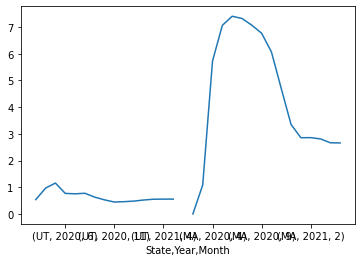

In [128]:
df_Final.loc[["UT","MA"],"Covid_Death_Rate"].plot.line()

<AxesSubplot:xlabel='State,Year,Month'>

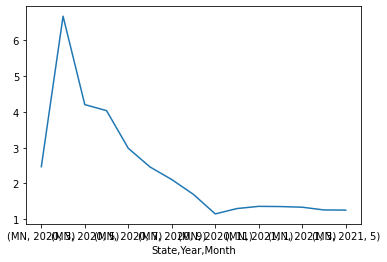

In [124]:
df_Final.loc[["MN"],"Covid_Death_Rate"].plot.line()

In [129]:
df_Final.to_csv("../Folder2/Cases_Deaths_DeathRate_byState_byMonth")

In [99]:
df_Final.unstack(level=[2,1])

Cum_Covid_Cases                                                          \
Month              1      2        3         4         5         6         7    
Year             2020   2020     2020      2020      2020      2020      2020   
State                                                                           
AK                0.0    0.0    128.0     355.0     463.0     908.0    2993.0   
AL               56.0  111.0   3164.0    9739.0   21539.0   46649.0  102433.0   
AR                0.0    0.0    560.0    3255.0    7253.0   20777.0   41759.0   
AS                0.0    0.0      0.0       0.0       0.0       0.0       0.0   
AZ                1.0    1.0   1289.0    7648.0   19936.0   79215.0  174010.0   
CA                3.0   12.0   8131.0   48917.0  110583.0  222917.0  493588.0   
CO                0.0    0.0   2966.0   15182.0   26378.0   32715.0   46809.0   
CT                0.0    0.0   3128.0   27700.0   42201.0   46514.0   49810.0   
DC                0.0    0.0    495.0    4323.0    8801.0   10327.0   12126.0   
DE                0.0    0.0    319.0    4734.0    9606.0   11510.0   14877.0   
FL                0.0    0.0   5489.0   33690.0   54764.0  143805.0  465030.0   
FSM               0.0    0.0      0.0       0.0       0.0       0.0       0.0   
GA                0.0    2.0   4236.0   24704.0   44145.0   81677.0  190734.0   
GU                0.0    0.0     71.0     146.0     175.0     267.0     356.0   
HI                0.0    0.0    283.0     607.0     644.0     908.0    2085.0   
IA                0.0    0.0    497.0    7145.0   19552.0   28947.0   44582.0   
ID                0.0    0.0    525.0    2015.0    2839.0    6117.0   20721.0   
IL                2.0    2.0   5994.0   52918.0  120260.0  144238.0  180118.0   
IN                0.0    0.0   2159.0   17835.0   34574.0   45594.0   66154.0   
KS                0.0    0.0    428.0    4238.0    9719.0   14443.0   27812.0   
KY                0.0    0.0    591.0    4708.0    9704.0   15624.0   30151.0   
LA                0.0    0.0   5237.0   28044.0   39916.0   58095.0  116280.0   
MA                0.0    1.0   3240.0   62205.0   96965.0  108882.0  117612.0   
MD                0.0    0.0   1660.0   23472.0   53327.0   67918.0   89365.0   
ME                0.0    0.0    303.0    1123.0    2349.0    3294.0    3937.0   
MI                0.0    0.0   7615.0   41379.0   57397.0   70728.0   90574.0   
MN                0.0    0.0    689.0    5136.0   25208.0   36716.0   55188.0   
MO                0.0    0.0   2558.0    8700.0   14093.0   25360.0   55735.0   
MP                0.0    0.0      2.0      14.0      22.0      30.0      42.0   
MS                0.0    0.0   1073.0    7212.0   15752.0   27900.0   59881.0   
MT                0.0    0.0    203.0     453.0     515.0    1018.0    3965.0   
NC                0.0    0.0   1498.0   10509.0   28590.0   64737.0  123081.0   
ND                0.0    0.0    126.0    1067.0    2577.0    3576.0    6602.0   
NE                0.0    0.0    177.0    4281.0   14101.0   19177.0   26211.0   
NH                0.0    0.0    367.0    2146.0    4651.0    5782.0    6583.0   
NJ                0.0    0.0  18696.0  118653.0  160807.0  172678.0  183964.0   
NM                0.0    0.0    315.0    3411.0    7689.0   11982.0   20600.0   
NV                0.0    0.0   1113.0    5007.0    8610.0   18684.0   48312.0   
NY                0.0    0.0  32656.0  134850.0  166909.0  178275.0  189866.0   
NYC               0.0    0.0  33474.0  162212.0  205555.0  217019.0  226767.0   
OH                0.0    0.0   2199.0   18027.0   35513.0   51789.0   91159.0   
OK                0.0   28.0   1654.0    4439.0    7327.0   18969.0   42546.0   
OR                0.0    1.0    690.0    2510.0    4243.0    8656.0   18493.0   
PA                0.0    0.0   4843.0   45763.0   72282.0   87242.0  111078.0   
PR                0.0    0.0    174.0    1539.0    3718.0    7465.0   17872.0   
PW                0.0    0.0      0.0

In [130]:
dff_Final = df_Final.unstack(level=[2,1]).iloc[:,49].sort_values(ascending=True)
dff_Final.to_csv("../Folder2/Final_DeathRate_byState_042021.csv")

In [125]:
dff_Final

State
RMI    0.000000
FSM    0.000000
AK     0.521335
UT     0.554209
VI     0.864000
NE     1.020306
VT     1.071802
ID     1.090293
WI     1.143160
MP     1.190476
WY     1.215988
CO     1.231980
MN     1.256834
ME     1.274175
NC     1.304560
OR     1.350021
WA     1.364381
NH     1.373227
ND     1.387973
TN     1.439293
MT     1.443708
KY     1.463770
MO     1.492813
OK     1.519501
HI     1.533546
DE     1.556439
SD     1.603620
FL     1.604283
KS     1.611620
IA     1.630843
VA     1.631512
SC     1.642731
CA     1.662034
GU     1.705329
TX     1.707011
AR     1.707780
NV     1.732195
NY     1.734250
PR     1.752170
OH     1.798357
RI     1.802464
IL     1.819476
GA     1.835143
WV     1.842250
IN     1.850574
MD     1.954766
MI     2.002527
AZ     2.008587
NM     2.056814
AL     2.063941
LA     2.263940
PA     2.277835
MS     2.306884
DC     2.316708
CT     2.386855
NJ     2.560801
MA     2.663615
NYC    3.507770
AS          NaN
PW          NaN
Name: (Covid_Death_Rate, 4, 2021),